In this project, i'm trying to classify credit card defaults using the random forest classifier, i'll elaborate the reasons why i decided to use this algorithm as i go along writing the code for this project.

First, we'll import the essential packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv(r'C:\Users\edgar\Desktop\stuff\tutorial python\datasets\UCI_Credit_Card.csv', index_col=0 )
print(data.shape) #we'll take a look at the dimension of the dataset
print(data.info()) #we'll get the the information of the dataset, the data types etc
print(data.head()) #print the first 5 rows of the dataset

(30000, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3          

###### The description of the data

There are 25 variables:

-ID: ID of each client
-LIMIT_BAL: Amount of given credit in NT dollars (includes individual and --family/supplementary credit

-SEX: Gender (1=male, 2=female)

-EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

-MARRIAGE: Marital status (1=married, 2=single, 3=others)

-AGE: Age in years

-PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

-PAY_2: Repayment status in August, 2005 (scale same as above)

-PAY_3: Repayment status in July, 2005 (scale same as above)

-PAY_4: Repayment status in June, 2005 (scale same as above)

-PAY_5: Repayment status in May, 2005 (scale same as above)

-PAY_6: Repayment status in April, 2005 (scale same as above)

-BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

-BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

-BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

-BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

-BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

-BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

-PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

-PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

-PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

-PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

-PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

-PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

-default.payment.next.month: Default payment (1=yes, 0=no)


2    18112
1    11888
Name: SEX, dtype: int64
0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64
default.payment.next.month         0         1
SEX                                           
1                           0.758328  0.241672
2                           0.792237  0.207763


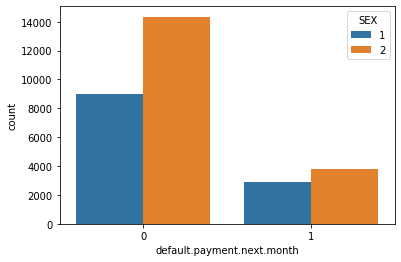

In [3]:
print(data['SEX'].value_counts())
print(data['default.payment.next.month'].value_counts(normalize=True))
print(pd.crosstab(data['SEX'], data['default.payment.next.month'], normalize='index'))
sns.countplot(x='default.payment.next.month', hue='SEX', data=data)

plt.show()


In [4]:
data['Pay_total']=data[['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis=1)
data['']


From the initial EDA, we gather that there are no missing values. But upon inspecting the types of the variables, some variable's types aren't correct.

-Sex is read as an integer variable when it should be categorical variable

-Education is read as an integer variable when it should be categorical variable

-Marriage is read as an integer variable when it should be categorical variable

-The label of the dataset (Default payment next month) should be a categorical variable instead of integer

#### this means we'll need to one-hot encode these variables

In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
X= data.drop('default.payment.next.month', axis=1)
y=data['default.payment.next.month']
print(X.head())

    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2

In [6]:
onehot = OneHotEncoder(sparse=False)
onehot.fit_transform(X[['SEX', 'EDUCATION', 'MARRIAGE']])

label = LabelEncoder()
label.fit_transform(y)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

score= accuracy_score(y_test, y_predict)

print(score)

0.8126666666666666


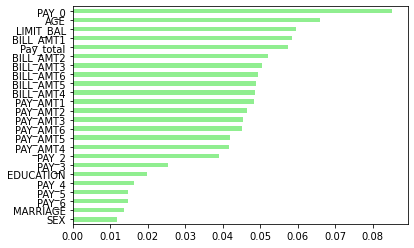

In [9]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

our baseline model produced an accuracy of 81.4%. Let's see if we can improve this with hyperparameter tuning.

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [12]:
y_pred_best = rf_random.predict(X_test)
score_tuned = accuracy_score(y_test, y_pred_best)
print(score_tuned)

0.8146666666666667


Since our data is imbalanced, we'll use the confusion matrix as an evaluation metric

In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_best, normalize='all'))


[[0.73716667 0.04166667]
 [0.14366667 0.0775    ]]
